# Lab 5: Overfitting and Regularization in Linear Regression

## Objective
- Understand overfitting in machine learning models.
- Implement L1 (Lasso) and L2 (Ridge) regularization.
- Compare the results of different models.

 ### 1. Import Required Libraries

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### 2. Load and Preprocess the Dataset

In [5]:
 #Read dataset
dataset = pd.read_csv('Melbourne_housing_FULL.csv')
# Display first 5 rows
dataset.head()
# Check unique values in each column
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

### 3. Select Relevant Features

In [7]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 
'Regionname', 'Propertycount', 
 'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 
'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]
# Display first few rows
dataset.head()
# Check dataset shape
dataset.shape
# Check missing values
dataset.isna().sum()


Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

### 4. Handle Missing Values


In [9]:
# Some features' missing values can be treated as zero (another class for NA values or absence of that feature)
# Example: 0 for Propertycount, Bedroom2 will refer to another class of NA values
# Example: 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# Other continuous features can be imputed with mean for faster results since our focus is on reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset['Landsize'].mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean())

# Drop remaining missing values
dataset.dropna(inplace=True)

# Check the updated dataset shape
dataset.shape



(27244, 15)

### 5. Encode Categorical Features

In [10]:
dataset = pd.get_dummies(dataset, drop_first=True)
# Display dataset after encoding
dataset.head()


,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


### Let's bifurcate our dataset into train and test dataset

In [11]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

### 6. Split Data into Training and Testing Sets

In [12]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,
test_size=0.3, random_state=2)


### 7.Train a Standard Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)
reg.score(test_X, test_y)
reg.score(train_X, train_y)

0.6827792395792723

### 8.Apply Ridge (L2) Regularization


In [14]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
ridge_reg.score(test_X, test_y)
ridge_reg.score(train_X, train_y)


0.6622376739684328

### 9. Apply Lasso (L1) Regularization

In [15]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
lasso_reg.score(test_X, test_y)
lasso_reg.score(train_X, train_y)

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


0.6766985624766824

### 10.Visualization

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Linear Regression - Train Score: 0.6828
Linear Regression - Test Score: 0.1385

Ridge Regression - Train Score: 0.6622
Ridge Regression - Test Score: 0.6671

Lasso Regression - Train Score: 0.6767
Lasso Regression - Test Score: 0.6636


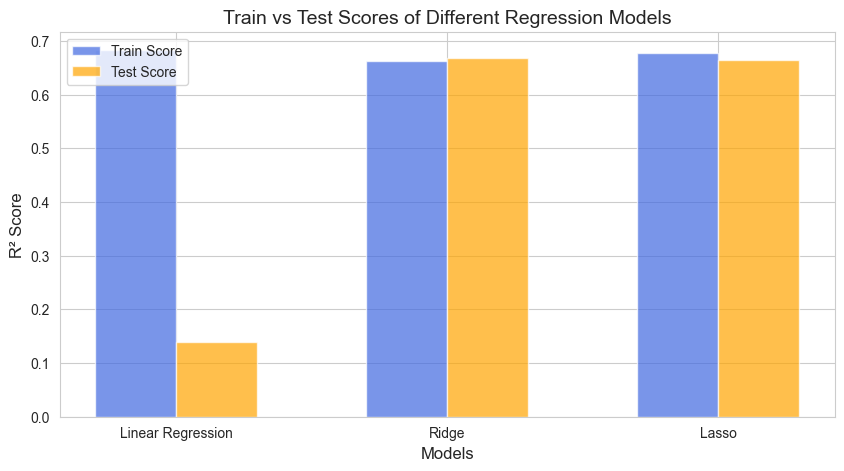

In [16]:
# Import necessary libraries
from sklearn.linear_model import Ridge, Lasso
# Train Ridge Regression (L2)
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
# Train Lasso Regression (L1)
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
# Store R² scores
lin_train_score = reg.score(train_X, train_y)
lin_test_score = reg.score(test_X, test_y)
ridge_train_score = ridge_reg.score(train_X, train_y)
ridge_test_score = ridge_reg.score(test_X, test_y)
lasso_train_score = lasso_reg.score(train_X, train_y)
lasso_test_score = lasso_reg.score(test_X, test_y)
# Create a dataframe for visualization
import pandas as pd
score_df = pd.DataFrame({
 "Model": ["Linear Regression", "Ridge", "Lasso"],
 "Train Score": [lin_train_score, ridge_train_score, 
lasso_train_score],
 "Test Score": [lin_test_score, ridge_test_score, lasso_test_score]
})
import matplotlib.pyplot as plt
import seaborn as sns
# Print the R² scores for each model
print(f"Linear Regression - Train Score: {lin_train_score:.4f}")
print(f"Linear Regression - Test Score: {lin_test_score:.4f}\n")
print(f"Ridge Regression - Train Score: {ridge_train_score:.4f}")
print(f"Ridge Regression - Test Score: {ridge_test_score:.4f}\n")
print(f"Lasso Regression - Train Score: {lasso_train_score:.4f}")
print(f"Lasso Regression - Test Score: {lasso_test_score:.4f}")
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for plots
sns.set_style("whitegrid")
# Plot Train vs Test scores for different models
plt.figure(figsize=(10, 5))
# Bar plot for Train and Test scores
X_axis = ["Linear Regression", "Ridge", "Lasso"]
train_scores = [lin_train_score, ridge_train_score, lasso_train_score]
test_scores = [lin_test_score, ridge_test_score, lasso_test_score]
bar_width = 0.3 # Bar width for better visibility
index = range(len(X_axis))
plt.bar(index, train_scores, width=bar_width, label="Train Score", 
color='royalblue', alpha=0.7)
plt.bar([i + bar_width for i in index], test_scores, width=bar_width, 
label="Test Score", color='orange', alpha=0.7)
# Labels and title
plt.xlabel("Models", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.title("Train vs Test Scores of Different Regression Models", 
fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], X_axis)
plt.legend()
plt.show()


## Lab Tasks

### 1. Data Preprocessing
#### • How did you handle missing values in the dataset?

```python
# Fill missing values with zero for selected columns
dataset.fillna({'Propertycount': 0, 'Distance': 0, 'Bedroom2': 0, 'Bathroom': 0, 'Car': 0}, inplace=True)

#### Fill other missing values with the mean

In [18]:
dataset['Landsize'].fillna(dataset['Landsize'].mean(), inplace=True)
dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean(), inplace=True)

#### Drop remaining missing values

In [19]:
dataset.dropna(inplace=True)

#### • Why did we use get_dummies() for categorical variables?
```python
# Convert categorical data to numerical using one-hot encoding
dataset = pd.get_dummies(dataset, drop_first=True)
```

### 2. Model Training & Performance

#### • What are the R² scores for the Linear Regression model on training and testing data?




In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(train_X, train_y)
print(f"Linear Regression R² Train Score: {reg.score(train_X, train_y)}")
print(f"Linear Regression R² Test Score: {reg.score(test_X, test_y)}")

Linear Regression R² Train Score: 0.6827792395792723
Linear Regression R² Test Score: 0.1385368316144978


#### • What does the difference between the train and test scores indicate?
- A large difference suggests overfitting, meaning the model performs well on training data but poorly on new data.

### 3. Ridge (L2) Regularization

#### • What are the train and test scores for Ridge Regression?

In [21]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
print(f"Ridge Regression R² Train Score: {ridge_reg.score(train_X, train_y)}")
print(f"Ridge Regression R² Test Score: {ridge_reg.score(test_X, test_y)}")

Ridge Regression R² Train Score: 0.6622376739684328
Ridge Regression R² Test Score: 0.6670848945194958


#### • How does Ridge Regression help in reducing overfitting?
- Ridge Regression adds a penalty term that reduces model complexity and prevents extreme coefficients.

### 4. Lasso (L1) Regularization
#### • What are the train and test scores for Lasso Regression?

In [22]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
print(f"Lasso Regression R² Train Score: {lasso_reg.score(train_X, train_y)}")
print(f"Lasso Regression R² Test Score: {lasso_reg.score(test_X, test_y)}")

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso Regression R² Train Score: 0.6766985624766824
Lasso Regression R² Test Score: 0.6636111369404489


#### • How does Lasso affect feature selection compared to Ridge?
- Lasso Regression can shrink some feature coefficients to zero, effectively selecting important features.

### 5. Comparison & Visualization
#### • Compare the performances of Linear, Ridge, and Lasso Regression models.

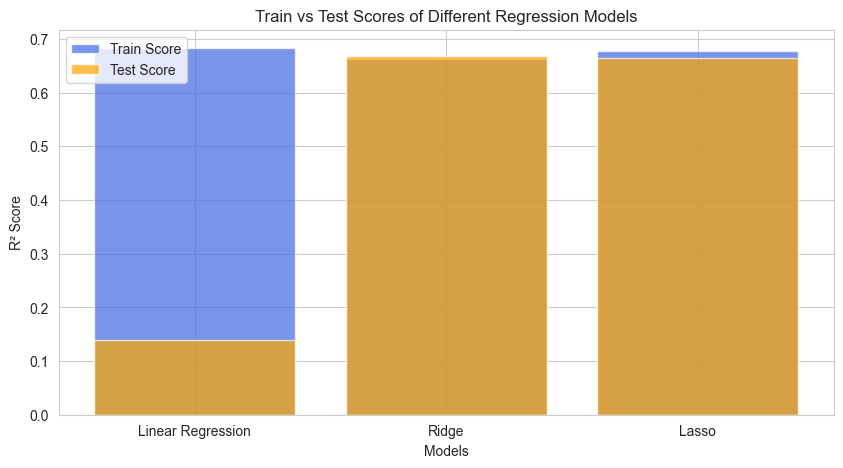

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Linear Regression', 'Ridge', 'Lasso']
train_scores = [reg.score(train_X, train_y), ridge_reg.score(train_X, train_y), lasso_reg.score(train_X, train_y)]
test_scores = [reg.score(test_X, test_y), ridge_reg.score(test_X, test_y), lasso_reg.score(test_X, test_y)]

plt.figure(figsize=(10, 5))
plt.bar(models, train_scores, alpha=0.7, label='Train Score', color='royalblue')
plt.bar(models, test_scores, alpha=0.7, label='Test Score', color='orange')
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Train vs Test Scores of Different Regression Models")
plt.legend()
plt.show()

#### • Based on the visualizations, which model performed best and why?
- The best model balances training and test performance without overfitting.

### 6. Regularization Impact
#### • What happens when you increase the alpha value in Ridge and Lasso Regression?
- Increasing `alpha` increases regularization, reducing overfitting but potentially leading to underfitting.
#### • If you had to choose one model for this dataset, which one would it be and why?
- The best choice depends on dataset complexity. Ridge is preferable for handling multicollinearity, while Lasso is useful for feature selection.
